Details:

Assignment-2

Names:
Jithendra Yenugula 2017300

Chenreddy Meghana 2017315

Srikar Paida 2017336


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('german_credit_data.csv')
data = df.copy()
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [3]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [5]:
df.isnull().sum().sum()

0

In [6]:
X =df.iloc[:,:-1]
y = df.iloc[:,-1]

X = X.astype(str)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
X_test

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
521,<0,18,existing paid,radio/tv,3190,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,24,none,own,1,skilled,1,none,yes
737,<0,18,existing paid,new car,4380,100<=X<500,1<=X<4,3,male single,none,4,car,35,none,own,1,unskilled resident,2,yes,yes
740,<0,24,all paid,new car,2325,100<=X<500,4<=X<7,2,male single,none,3,car,32,bank,own,1,skilled,1,none,yes
660,>=200,12,existing paid,radio/tv,1297,<100,1<=X<4,3,male mar/wid,none,4,real estate,23,none,rent,1,skilled,1,none,yes
411,no checking,33,critical/other existing credit,used car,7253,<100,4<=X<7,3,male single,none,2,car,35,none,own,2,high qualif/self emp/mgmt,1,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,>=200,15,critical/other existing credit,used car,2360,500<=X<1000,1<=X<4,2,male single,none,2,car,36,none,own,1,skilled,1,yes,yes
342,0<=X<200,18,existing paid,radio/tv,3213,500<=X<1000,<1,1,male mar/wid,none,3,real estate,25,none,rent,1,skilled,1,none,yes
485,0<=X<200,6,delayed previously,new car,1209,<100,unemployed,4,male single,none,4,life insurance,47,none,own,1,high qualif/self emp/mgmt,1,yes,yes
711,<0,6,all paid,education,1198,<100,>=7,4,female div/dep/mar,none,4,no known property,35,none,for free,1,skilled,1,none,yes


In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

oe = OrdinalEncoder()
oe.fit(X_train)

OrdinalEncoder()

In [10]:
X_train_enc = oe.transform(X_train)

In [11]:
X_train_enc

array([[ 0., 15.,  2., ...,  0.,  0.,  1.],
       [ 3., 11.,  3., ...,  0.,  0.,  1.],
       [ 1.,  2.,  3., ...,  0.,  0.,  1.],
       ...,
       [ 3., 11.,  1., ...,  0.,  0.,  1.],
       [ 0.,  2.,  3., ...,  0.,  1.,  1.],
       [ 3., 24.,  2., ...,  0.,  0.,  1.]])

In [12]:
oe.fit(X_test)

OrdinalEncoder()

In [13]:
X_test_enc = oe.transform(X_test)

In [14]:
X_test_enc

array([[ 1.,  7.,  3., ...,  0.,  0.,  1.],
       [ 1.,  7.,  3., ...,  1.,  1.,  1.],
       [ 1., 11.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0., 23.,  2., ...,  0.,  1.,  1.],
       [ 1., 23.,  0., ...,  0.,  0.,  1.],
       [ 3.,  7.,  3., ...,  0.,  0.,  1.]])

In [15]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [16]:
y_train_enc

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
bestfeatures.fit(X_train_enc, y_train_enc)

SelectKBest(k='all', score_func=<function chi2 at 0x7fed8437e320>)

In [18]:
for i in range(len(bestfeatures.scores_)):
    print('Feature %d: %f' % (i, bestfeatures.scores_[i]))

Feature 0: 57.827190
Feature 1: 12.952342
Feature 2: 7.586230
Feature 3: 18.509831
Feature 4: 23.396264
Feature 5: 2.270106
Feature 6: 0.856159
Feature 7: 0.616435
Feature 8: 6.988766
Feature 9: 0.013812
Feature 10: 0.046118
Feature 11: 2.917774
Feature 12: 106.068999
Feature 13: 0.484396
Feature 14: 0.028705
Feature 15: 1.767104
Feature 16: 0.727985
Feature 17: 0.000042
Feature 18: 0.363243
Feature 19: 0.187659


In [19]:
scores = pd.DataFrame(bestfeatures.scores_)
columns = pd.DataFrame(X.columns)

final = pd.concat([columns, scores], axis=1)
final.columns = ['name','score']

In [20]:
final.sort_values(by=['score'],ascending=False)

,name,score
12,age,106.068999
0,checking_status,57.827190
4,credit_amount,23.396264
3,purpose,18.509831
1,duration,12.952342
2,credit_history,7.586230
8,personal_status,6.988766
11,property_magnitude,2.917774
5,savings_status,2.270106
15,existing_credits,1.767104


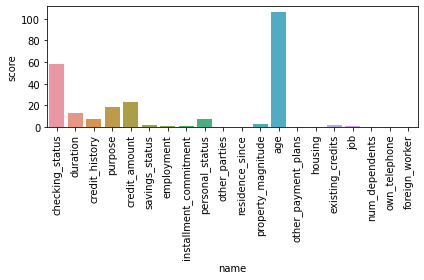

In [21]:
ax = sns.barplot(x="name", y="score", data=final)
plt.xticks(rotation=90)
plt.tight_layout()

In [22]:
bestfeatures = SelectKBest(score_func=chi2, k=7)
bestfeatures.fit(X_train_enc, y_train_enc)

X_train_cs = bestfeatures.transform(X_train_enc)
X_test_cs = bestfeatures.transform(X_test_enc)

In [23]:
X_train_cs.shape

(670, 7)

### Logistic Regression

In [24]:
# with all features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
model1 = LogisticRegression()
model1.fit(X_train_enc, y_train_enc)

LogisticRegression()

In [25]:
yhat1 = model1.predict(X_test_enc)
accuracy1 = accuracy_score(y_test_enc, yhat1)
print('Accuracy with logistic regresion when all features are considered:%.2f %%' %(accuracy1*100))

Accuracy with logistic regresion when all features are considered:68.79 %


In [26]:
model2 = LogisticRegression()
# fitting the model over selected features of encoded input variables and encoded target variables
model2.fit(X_train_cs, y_train_enc)
# predict the target varibles for the test dataset
yhat2 = model2.predict(X_test_cs)
# calculating the training accuracy
accuracy2 = accuracy_score(y_test_enc, yhat2)
print(r'Accuracy with Logistic Regression when selected features are considered:%.2f %%' %(accuracy2*100))

Accuracy with Logistic Regression when selected features are considered:68.48 %


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(random_state=0)
model3.fit(X_train_enc,y_train_enc)
yhat3 = model3.predict(X_test_enc)
accuracy3 = accuracy_score(y_test_enc, yhat3)
print(r'Accuracy with decision tree when all features are considered:%.2f %%' %(accuracy3*100))

Accuracy with decision tree when all features are considered:65.76 %


In [28]:
model4 = DecisionTreeClassifier(random_state=0)
# fitting the model over selected features of encoded input variables and encoded target variables
model4.fit(X_train_cs, y_train_enc)
# predict the target varibles for the test dataset
yhat4 = model4.predict(X_test_cs)
# calculating the training accuracy
accuracy4 = accuracy_score(y_test_enc, yhat4)
print(r'Accuracy with Decision Tree when selected features are considered:%.2f %%' %(accuracy4*100))

Accuracy with Decision Tree when selected features are considered:63.03 %


In [29]:
yhat11 = model1.predict(X_train_enc)
accuracy = accuracy_score(y_train_enc, yhat11)
print('In sample accuracy: ')
print(accuracy)
print('In sample misclassification rate for Logistic regression: ')
print(1-accuracy)


yhat31 = model3.predict(X_train_enc)
accuracy = accuracy_score(y_train_enc, yhat31)
print('In sample accuracy: ')
print(accuracy)
print('In sample misclassification rate for Decision Tree: ')
print(1-accuracy)



In sample accuracy: 
0.7328358208955223
In sample misclassification rate for Logistic regression: 
0.26716417910447765
In sample accuracy: 
1.0
In sample misclassification rate for Decision Tree: 
0.0


In [30]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix of Logistic Regression over all variables')
confusion1 = confusion_matrix(y_test_enc,yhat1)
print(confusion1)

print('Confusion matrix of Logistic Regression over selected variables')
confusion2 = confusion_matrix(y_test_enc,yhat2)
print(confusion2)

print('Confusion matrix of Decision Tree over all variables')
confusion3 = confusion_matrix(y_test_enc,yhat3)
print(confusion3)

print('Confusion matrix of Decision Tree over selected variables')
confusion4 = confusion_matrix(y_test_enc,yhat4)
print(confusion4)


Confusion matrix of Logistic Regression over all variables
[[ 22  79]
 [ 24 205]]
Confusion matrix of Logistic Regression over selected variables
[[ 19  82]
 [ 22 207]]
Confusion matrix of Decision Tree over all variables
[[ 47  54]
 [ 59 170]]
Confusion matrix of Decision Tree over selected variables
[[ 32  69]
 [ 53 176]]


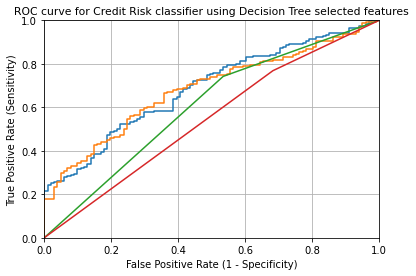

In [31]:
from sklearn.metrics import roc_curve

yhat1_probs = model1.predict_proba(X_test_enc)[:,1] # gives all probabilities of target classes
fpr, tpr, thresholds = roc_curve(y_test_enc, yhat1_probs)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 9
plt.title('ROC curve for Credit Risk classifier using Logistic Regression all features')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

yhat2_probs = model2.predict_proba(X_test_cs)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_enc, yhat2_probs)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 9
plt.title('ROC curve for Credit Risk classifier using Logistic Regression selected features')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

yhat3_probs = model3.predict_proba(X_test_enc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_enc, yhat3_probs)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 9
plt.title('ROC curve for Credit Risk classifier using Decision Tree all features')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

yhat4_probs = model4.predict_proba(X_test_cs)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_enc, yhat4_probs)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 9
plt.title('ROC curve for Credit Risk classifier using Decision Tree selected features')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

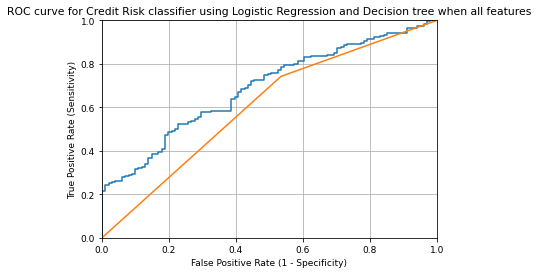

In [32]:
yhat1_probs = model1.predict_proba(X_test_enc)[:,1] # gives all probabilities of target classes
fpr, tpr, thresholds = roc_curve(y_test_enc, yhat1_probs)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 9
plt.title('ROC curve for Credit Risk classifier using Logistic Regression and Decision tree when all features')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

yhat3_probs = model3.predict_proba(X_test_enc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_enc, yhat3_probs)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 9
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

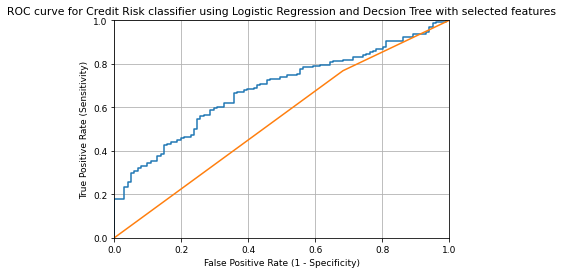

In [33]:
yhat2_probs = model2.predict_proba(X_test_cs)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_enc, yhat2_probs)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 9
plt.title('ROC curve for Credit Risk classifier using Logistic Regression and Decsion Tree with selected features')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

yhat4_probs = model4.predict_proba(X_test_cs)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_enc, yhat4_probs)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 9
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.grid(True)

In [34]:
print('Out of sample Misclassification rate for logistic regression all features: ')
print(1-accuracy1)

print('Out of sample Misclassification rate for logistic regression selected features: ')
print(1-accuracy2)

print('Out of sample Misclassification rate for decision tree all features: ')
print(1-accuracy3)

print('Out of sample Misclassification rate for decision tree selected features: ')
print(1-accuracy4)

Out of sample Misclassification rate for logistic regression all features: 
0.31212121212121213
Out of sample Misclassification rate for logistic regression selected features: 
0.3151515151515152
Out of sample Misclassification rate for decision tree all features: 
0.3424242424242424
Out of sample Misclassification rate for decision tree selected features: 
0.36969696969696975


In [35]:
from sklearn.metrics import roc_auc_score
print('AUC score of Logistic Regression when all features are used: ')
print(roc_auc_score(y_test_enc, yhat1_probs))

print('AUC score of Logistic Regression when selected features are used: ')
print(roc_auc_score(y_test_enc, yhat2_probs))

print('AUC score of Decision tree when all features are used: ')
print(roc_auc_score(y_test_enc, yhat3_probs))

print('AUC score of Decision tree when selected features are used: ')
print(roc_auc_score(y_test_enc, yhat4_probs))

AUC score of Logistic Regression when all features are used: 
0.6882269012927493
AUC score of Logistic Regression when selected features are used: 
0.6826062518915648
AUC score of Decision tree when all features are used: 
0.6038523066280427
AUC score of Decision tree when selected features are used: 
0.5426953175666911
